<a href="https://colab.research.google.com/github/Aditihegde27/Mini-Project---Image-Classification-/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader


In [ ]:
cd /content/drive/My Drive/Mini Project

/content/drive/My Drive/Mini Project


In [ ]:
cd images

/content/drive/My Drive/Mini Project/images


In [ ]:
from bing_image_downloader import downloader
downloader.download("cat animal",limit = 5000,output_dir = 'images')

In [ ]:
downloader.download("dog animal",limit = 5000,output_dir = 'images')

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
dir = '/content/drive/My Drive/Mini Project/images/images'
categories= ['cat animal','dog animal']

In [5]:
 data= []
for category in categories  :
    path=os.path.join(dir,category)
    label=categories.index(category)
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        
        pet = cv2.imread(imgpath,0)
        try:
           pet = cv2.cvtColor(pet,cv2.COLOR_BGR2RGB)
           pet = cv2.resize(pet,(64,64))
           image=np.array(pet).flatten()
           data.append([image,label])
        except Exception as e:
          pass

print(len(data))

10460


In [6]:
pick_in=open('data.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [7]:
pick_in=open('data.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [9]:
random.shuffle(data)
features = []
labels = []


In [10]:
for feature ,label in data:
  features.append(feature)
  labels.append(label)

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size= 0.98)

In [12]:
model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

In [14]:
pick = open('model.sav','rb')
model = pickle.load(pick)
pick.close()

In [15]:
prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

In [16]:
categories = ['cat animal','dog animal']

In [17]:
print('Accuracy :',accuracy)
print('Prediction  is :',categories[prediction[0]])

Accuracy : 0.7654862940200956
Prediction  is : cat animal


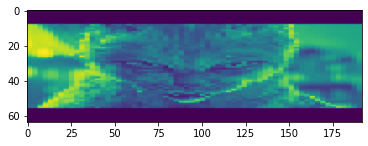

In [31]:
mypet = xtest[0].reshape(64,192)
cv2.cvtColor(mypet,cv2.COLOR_BGR2RGB)
plt.imshow(mypet)
plt.show()